In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
wage = pd.read_csv('Wage.xls')

In [3]:
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
# dropping some unneeded columns
wage = wage.drop('Unnamed: 0', axis = 'columns')

In [5]:
wage = wage.drop('logwage', axis = 'columns')

In [6]:
#checking the names of distinct region
wage.region.unique()

array(['2. Middle Atlantic'], dtype=object)

In [7]:
#checking the names of distinct gender
wage.sex.unique()

array(['1. Male'], dtype=object)

In [8]:
#dropping region since all the inputed data came from the same region
wage = wage.drop('region', axis = 'columns')

In [9]:
#dropping sex since all the data gender is male
wage = wage.drop('sex', axis = 'columns')

In [10]:
wage.head()

,year,age,maritl,race,education,jobclass,health,health_ins,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,75.043154


In [11]:
wage.describe()

,year,age,wage
count,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,111.703608
std,2.026167,11.542406,41.728595
min,2003.000000,18.000000,20.085537
25%,2004.000000,33.750000,85.383940
50%,2006.000000,42.000000,104.921507
75%,2008.000000,51.000000,128.680488
max,2009.000000,80.000000,318.342430


In [12]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
wage          3000 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.7+ KB


In [13]:
wage.shape

(3000, 9)

In [14]:
#checking the number of distinct age 
wage['age'].value_counts(ascending = True)

77      1
75      2
76      3
74      3
72      3
68      4
80      4
73      5
69      5
70      6
67      7
71      8
65      8
64     11
18     11
66     13
19     14
21     15
20     20
63     27
62     30
24     32
61     33
60     37
22     38
59     39
57     42
23     45
26     47
27     53
     ... 
58     57
29     58
28     59
56     62
53     62
31     63
55     65
36     66
54     68
52     69
30     74
35     75
34     76
37     77
32     78
46     80
51     82
49     83
38     83
33     87
42     88
39     89
41     92
48     93
44     93
50     95
45     95
43     98
47     98
40    113
Name: age, Length: 61, dtype: int64

In [15]:
#grouping age into teenage,youth,adult,old adult and old so it will be easier to analyse
def category(age):
    if age >= 18 and age <= 20:
        return '1.Teenage'
    elif age >= 21 and age <= 35:
        return '2.Youth'
    elif age >= 36 and age <=49 :
        return '3.Adult'
    elif age >= 50 and age <= 65:
        return '4.Old Adult'
    elif age >= 66:
        return '5.Old'
    
wage['age category']=wage['age'].apply(category)

wage.head()

,year,age,maritl,race,education,jobclass,health,health_ins,wage,age category
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,75.043154,1.Teenage
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,70.476020,2.Youth
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,130.982177,3.Adult
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,154.685293,3.Adult
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,75.043154,4.Old Adult


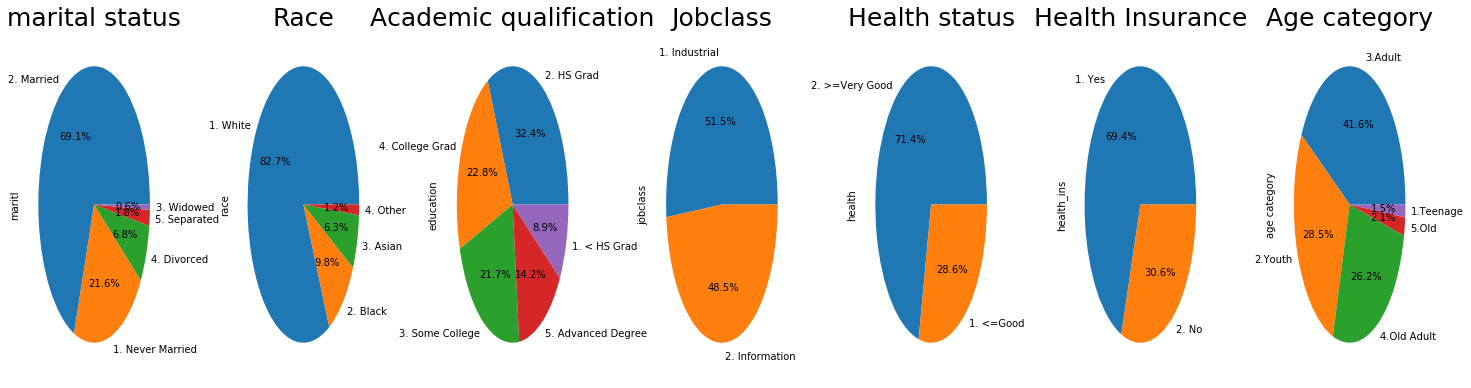

In [16]:
#graphical representation of the variables
plt.figure(figsize=(25,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.1)

plt.subplot(171)
plt.title('marital status',fontsize = 25)
wage['maritl'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(172)
plt.title('Race',fontsize = 25)
wage['race'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(173)
plt.title('Academic qualification',fontsize = 25)
wage['education'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(174)
plt.title('Jobclass',fontsize = 25)
wage['jobclass'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(175)
plt.title('Health status',fontsize = 25)
wage['health'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(176)
plt.title('Health Insurance',fontsize = 25)
wage['health_ins'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(177)
plt.title('Age category',fontsize = 25)
wage['age category'].value_counts().plot.pie(autopct="%1.1f%%")


plt.show()

#it is shown from the dataset that 
#majority of are married with 68.1%
#Majority of the dataset are white
#majority has HS Grad academic qualification
#Higher population are in the industrial jobclass with 51.5%
#majority has a very good health status with 71.4%
#68.4% has health insurance 
#majotity of the population are in the age range of 36-49 

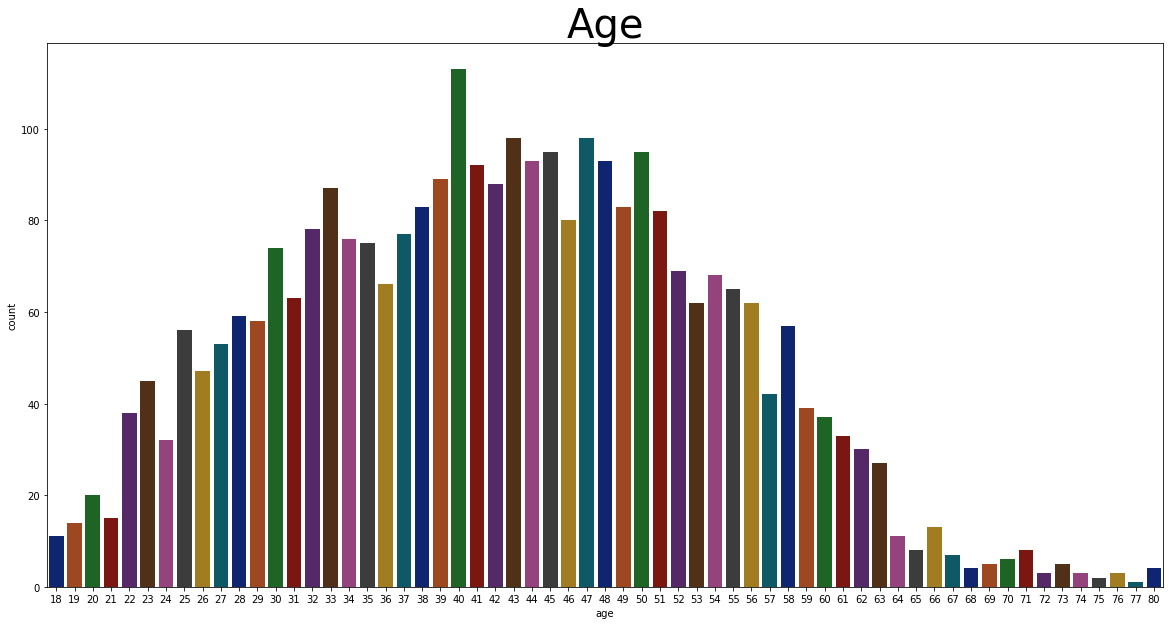

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(wage['age'], palette = 'dark')
plt.title('Age',fontsize = 40)
plt.show()

#Higher population are 40years old

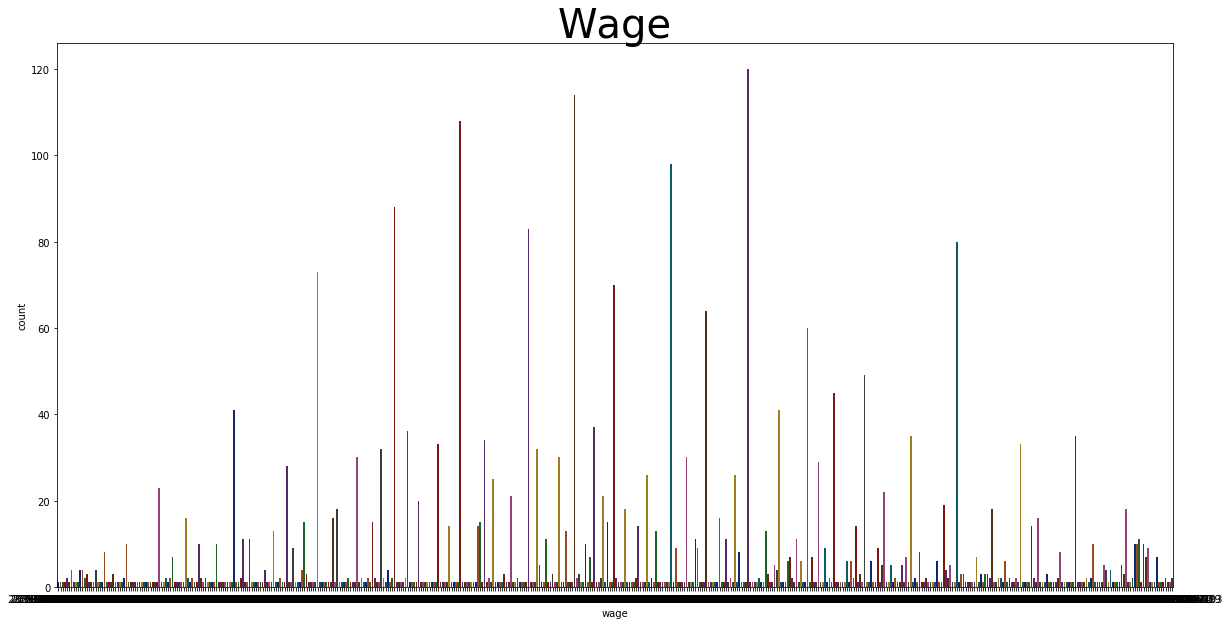

In [18]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(wage['wage'], palette = 'dark')
plt.title('Wage',fontsize = 40)
plt.show()

In [19]:
#The distinct age are much,so it is necessary to group them for better analysis.It is grouped into low pay,normal pay and high pay
def category(wage):
    if wage >= 20 and wage < 120:
        return 'Low pay'
    elif wage >= 120 and wage < 250:
        return 'Normal pay'
    elif wage >= 250:
        return 'High pay'
    
wage['wage category']=wage['wage'].apply(category)

wage.head()

,year,age,maritl,race,education,jobclass,health,health_ins,wage,age category,wage category
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,75.043154,1.Teenage,Low pay
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,70.476020,2.Youth,Low pay
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,130.982177,3.Adult,Normal pay
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,154.685293,3.Adult,Normal pay
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,75.043154,4.Old Adult,Low pay


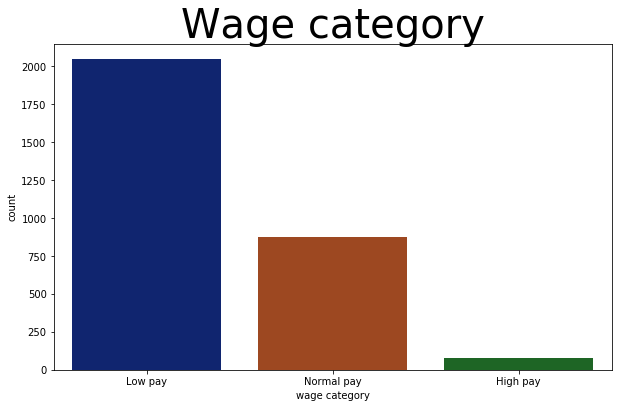

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(wage['wage category'], palette = 'dark')
plt.title('Wage category',fontsize = 40)
plt.show()

#It is shown that majority of the dataset receive 20-120 wage pay

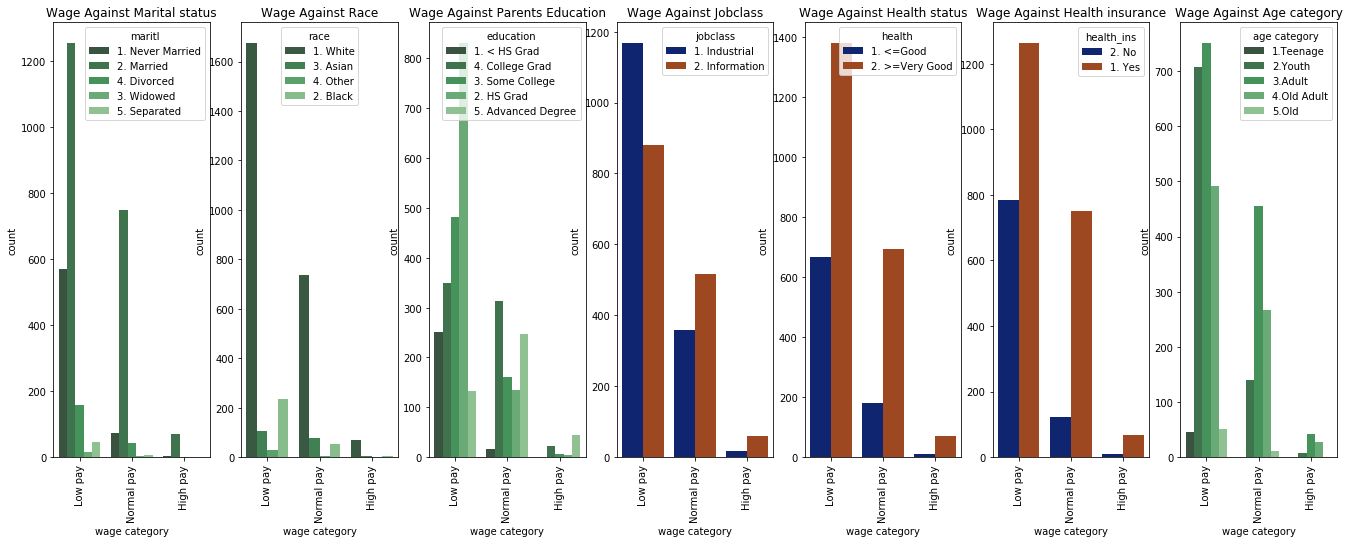

In [21]:
#Graphical representations showing relationships beteween each variable with the average score category

plt.figure(figsize=(23,8))

plt.subplot(1,7,1)
sns.countplot(x = "wage category" ,hue="maritl" , data=wage ,palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Wage Against Marital status")

plt.subplot(1,7,2)
sns.countplot(x = "wage category" ,hue="race" , data=wage ,palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Wage Against Race")

plt.subplot(1,7,3)
sns.countplot(x = "wage category" ,hue="education" , data=wage ,palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Wage Against Parents Education")

plt.subplot(1,7,4)
sns.countplot(x = "wage category" ,hue="jobclass" , data=wage ,palette="dark")
plt.xticks(rotation=90)
plt.title("Wage Against Jobclass")

plt.subplot(1,7,5)
sns.countplot(x = "wage category" ,hue="health" , data=wage ,palette="dark")
plt.xticks(rotation=90)
plt.title("Wage Against Health status")

plt.subplot(1,7,6)
sns.countplot(x = "wage category" ,hue="health_ins" , data=wage ,palette="dark")
plt.xticks(rotation=90)
plt.title("Wage Against Health insurance")

plt.subplot(1,7,7)
sns.countplot(x = "wage category" ,hue="age category" , data=wage ,palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Wage Against Age category")
plt.show()

#It is seen that majority of the population get between 20 to 119 wage pay with;
#the married having the highest record .
#the white race having the highest record
#the HS Grad academic qualification having the highest record
#the industrial jobclass having the highest record
#the population with very good health status having the highest record
#the population with health insurance having the highest record
#the people in the age range 36 to 49 having the highest record closely followed by people in the age range 21 to 35.

In [22]:
#The same category of people also have higher record in the high pay (receive more that 250 wage pay) except in the 
#academic qualification where those with advanced degree have higher record.

In [23]:
#It is shown that, the married in the white race whose academic qualification is college Grad who work in the 
#information jobclass with a very good health status and has health insurance and in the age range 21 to 35 get
#between 120 to 249 wage pay (normal pay).